This is the hello world program for tensorflow.  This basically just involves creating data that follows a line and then using a neural network model to fit this line.  For practise I implement the line using the functional API, the sequential api and using gradient tape.

Step 1 create the data

In [11]:
import tensorflow as tf
import numpy as np
import random

random.seed(10)

In [12]:
true_m = 2.0
true_b = -4.0

In [58]:
NUM_EXAMPLES = 1000 
NOISE_FACTOR = 20
xs = [random.uniform(-50, 50) for i in range(300)]


ys_pred = [true_m * x + true_b + (random.random() -0.5) *NOISE_FACTOR for x in xs]
xdata = np.array(xs)
ydata_pred = np.array(ys_pred)

In [59]:
# plotting the data
import matplotlib.pyplot as plt
import numpy as np

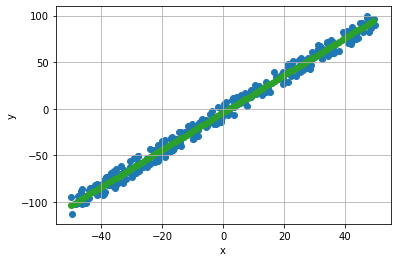

In [60]:
# True data expectation
t = np.arange(-50.0, 50.0, 1)
s = true_b + true_m * t

fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')
ax.scatter(t, s, c='tab:green')

ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()


In [74]:
# define sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(xdata, ydata_pred, epochs=20)


Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 2303.6711 - accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 0s 900us/step - loss: 841.8011 - accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 128.7697 - accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 0s 900us/step - loss: 105.9866 - accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 0s 902us/step - loss: 67.7978 - accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 68.9970 - accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 0s 1ms/step - loss: 56.1107 - accuracy: 0.0000e+00
Epoch 8/20
10/10 [==============================] - 0s 800us/step - loss: 53.9302 - accuracy: 0.0000e+00
Epoch 9/20
10/10 [==============================] - 0s 900us/step - loss: 55.1042 - accuracy: 0.0000e+00
Epoch 10/20
10/10 [==============================] - 0s 10

In [75]:
y_calc = model.predict(t)

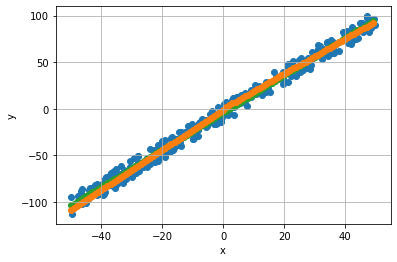

In [76]:
t = np.arange(-50.0, 50.0, 1)
s = true_b + true_m * t
y_calc = model.predict(t)

fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')
ax.scatter(t, s, c='tab:green')
ax.scatter(t, y_calc, c='tab:orange')

ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()


[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0